Epoch 1/300
2/2 [==============================] - 0s 116ms/step - loss: 0.7844 - acc: 0.7596 - val_loss: 0.5725 - val_acc: 0.7795
Epoch 2/300
2/2 [==============================] - 0s 20ms/step - loss: 0.5981 - acc: 0.7642 - val_loss: 0.4143 - val_acc: 0.7826
Epoch 3/300
2/2 [==============================] - 0s 19ms/step - loss: 0.4410 - acc: 0.7718 - val_loss: 0.3250 - val_acc: 0.7950
Epoch 4/300
2/2 [==============================] - 0s 18ms/step - loss: 0.3739 - acc: 0.7734 - val_loss: 0.3308 - val_acc: 0.8416
Epoch 5/300
2/2 [==============================] - 0s 15ms/step - loss: 0.3827 - acc: 0.8101 - val_loss: 0.3423 - val_acc: 0.9068
Epoch 6/300
2/2 [==============================] - 0s 18ms/step - loss: 0.3818 - acc: 0.8499 - val_loss: 0.3260 - val_acc: 0.9193
Epoch 7/300
2/2 [==============================] - 0s 14ms/step - loss: 0.3588 - acc: 0.8698 - val_loss: 0.3058 - val_acc: 0.9130
Epoch 8/300
2/2 [==============================] - 0s 19ms/step - loss: 0.3363 - acc: 0.8

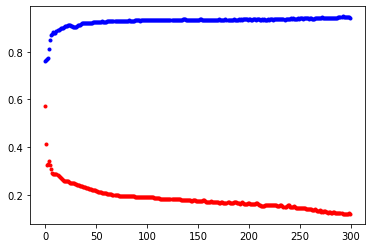

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv('../data/wine.csv', header=None)

# 전체 샘플 중 15%만 추출
df = df.sample(frac=0.15)

X = df.drop(12, axis=1).values
y = df[12].values

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 이진분류 이므로 오차함수는 binary_crossentropy, 최적화 함수는 adam 사용
# Keras 버전 업데이트로 인해 metrics를 accuracy -> acc로 변경해야 history에서 acc사용 가능하므로 변경
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# 모델 실행 및 저장
hist = model.fit(X, y, validation_split=0.33, epochs=300, batch_size=500)

# y_acc에 학습셋으로 측정한 정확도값 저장
y_acc = hist.history['acc']

# y_vloss에 테스트셋으로 실험 결과의 오차값 저장
y_vloss = hist.history['val_loss']

# x 값을 지정하고 정확도 파란색, 오차 빨간색 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)

plt.show()